# 导入相关库

In [1]:
pip install sklearn

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/python-3.7.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from MLP import MLP
import sklearn
from utils.Data import DataClass, DataSet, DataSpliter
import numpy as np
from sklearn.datasets import load_iris, load_wine   # 注意是导入的数据集
import logging
from matplotlib import pyplot as plt
logging.disable(logging.WARNING)    # 禁用 DataSet 定义的 Logging
from time import time

- 设置打印结果的函数

In [3]:
def trainResultPrint(dataSetName: str, trainingTime: int, trainacc: float, testacc: float, lr: float, epochNum: int):
    print(" * {:s} 数据集的训练结果：".format(dataSetName))
    print("    - 训练时长为:          {:.2f} s".format(trainingTime))
    print("    - 迭代总次数为:        {:d} ".format(epochNum))
    print("    - 学习率为:            {:.6f} ".format(lr))
    print("    - 训练集上的准确率为:  {:.2%} ".format(trainacc))
    print("    - 测试集上的准确率为:  {:.2%} ".format(testacc))
    print()

# 鸢尾花数据集
- 导入鸢尾花数据集

In [4]:
dataset_iris = load_iris()
feature_iris = dataset_iris.data
label_iris = dataset_iris.target
labelName_iris = dataset_iris.target_names
title_iris = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]

- 构建，划分数据集

In [5]:
dataset_iris = DataSet(feature_iris, label_iris, title_iris)
feature_iris, label_iris = dataset_iris.getFeatureAndLabel()
trainFeatureSet, trainLabelSet, testFeatureSet, testLabelSet = DataSpliter.trainAndTestSetSpliter_bareData(feature_iris, label_iris)

- 构建模型

In [6]:
st = time()
md = MLP(n_input = 4, n_hidden = 30, n_output = 3)
lr = 0.001
epochNum = 5000
md.optimize(trainFeatureSet, trainLabelSet, epochNum = epochNum, lr = lr, decay = "none", printMsg = True)
acc_train = md.eval(trainFeatureSet, trainLabelSet)
acc_test = md.eval(testFeatureSet, testLabelSet)
ed = time()

 + 当前是第 1000 次迭代
 + 当前是第 2000 次迭代
 + 当前是第 3000 次迭代
 + 当前是第 4000 次迭代
 + 当前是第 5000 次迭代


- 训练结果

In [7]:
trainResultPrint("鸢尾花", ed - st, acc_train, acc_test, lr, epochNum)

 * 鸢尾花 数据集的训练结果：
    - 训练时长为:          21.14 s
    - 迭代总次数为:        5000 
    - 学习率为:            0.001000 
    - 训练集上的准确率为:  96.19% 
    - 测试集上的准确率为:  100.00% 



均方损失曲线

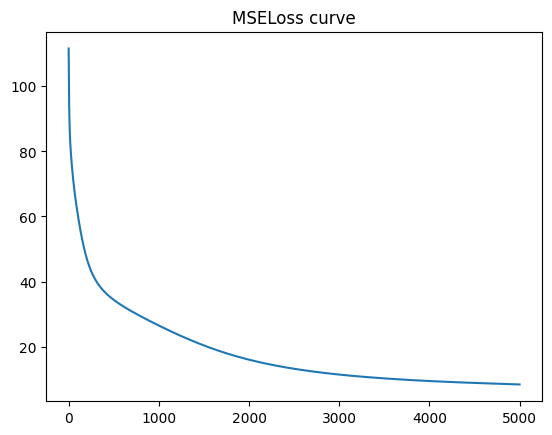

In [8]:
y_iris = md.getTrainLoss()
plt.plot(y_iris)
plt.title("MSELoss curve")
plt.rcParams['figure.figsize'] = (20.0, 12.0)
plt.show()

# 红酒数据集
- 读取数据

In [9]:
dataset_wine = load_wine()
feature_wine = dataset_wine.data
label_wine = dataset_wine.target
labelName_wine = dataset_wine.target_names
title_wine = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

- 构建数据集，划分数据

In [10]:
dataset_wine = DataSet(feature_wine, label_wine, title_wine)
dataset_wine.rescaling()
feature_wine, label_wine = dataset_wine.getFeatureAndLabel()
trainFeatureSet, trainLabelSet, testFeatureSet, testLabelSet = DataSpliter.trainAndTestSetSpliter_bareData(feature_wine, label_wine, trainRatio = 0.7)

- 模型训练

In [11]:
st = time()
md = MLP(n_input = 13, n_hidden = 50, n_output = 3)
lr = 0.0001
epochNum = 5000
md.optimize(trainFeatureSet, trainLabelSet, epochNum = 5000, lr = 0.0001, decay = "none", printMsg = True)
acc = md.eval(testFeatureSet, testLabelSet)
ed = time()
trainacc = md.eval(trainFeatureSet, trainLabelSet)
testacc = md.eval(testFeatureSet, testLabelSet)

 + 当前是第 1000 次迭代
 + 当前是第 2000 次迭代
 + 当前是第 3000 次迭代
 + 当前是第 4000 次迭代
 + 当前是第 5000 次迭代


- 训练结果

In [12]:
trainResultPrint("红酒(UCI)", ed - st, trainacc, testacc, lr, epochNum)

 * 红酒(UCI) 数据集的训练结果：
    - 训练时长为:          33.54 s
    - 迭代总次数为:        5000 
    - 学习率为:            0.000100 
    - 训练集上的准确率为:  99.19% 
    - 测试集上的准确率为:  92.73% 



- 损失曲线

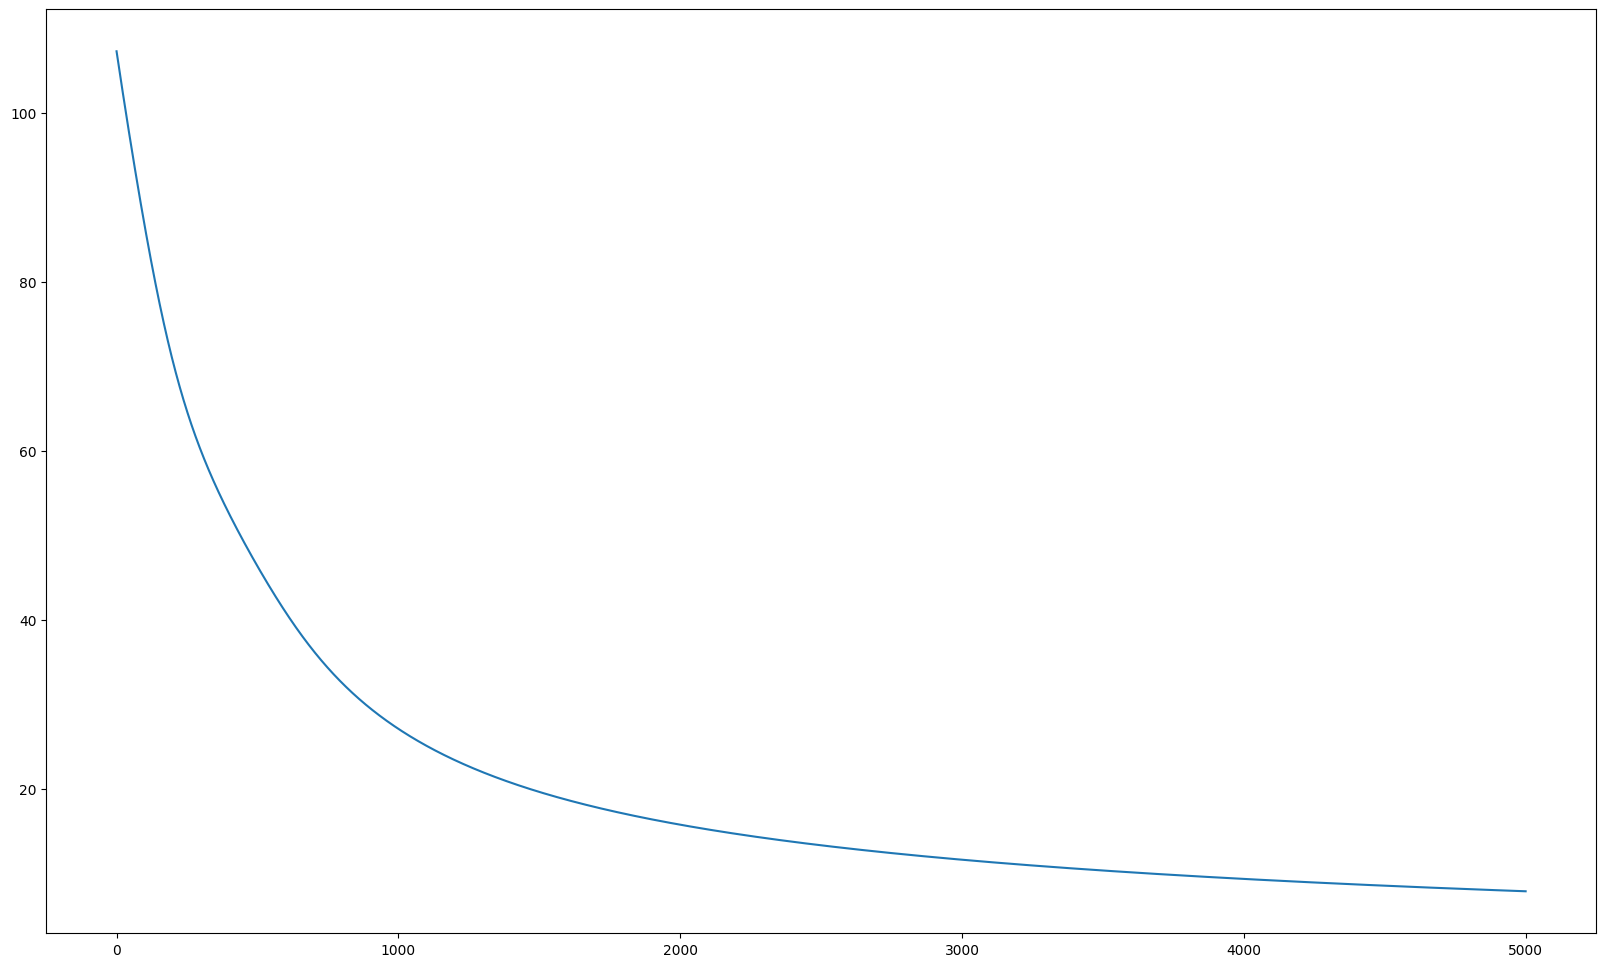

In [13]:
y_wine = md.getTrainLoss()
plt.plot(y_wine)
plt.rcParams['figure.figsize'] = (20.0, 12.0)
plt.show()